In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline

#Load deepforest
from deepforest import deepforest
from deepforest import preprocess

/Users/ben/Documents/DeepForest_French_Guiana/DeepForest/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ben/Documents/DeepForest_French_Guiana/DeepForest/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ben/Documents/DeepForest_French_Guiana/DeepForest/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint

# Load DeepForest prebuilt model

In [2]:
model = deepforest.deepforest()



Reading config file: /Users/ben/Documents/DeepForest_French_Guiana/DeepForest/lib/python3.6/site-packages/deepforest/data/deepforest_config.yml
A blank deepforest object created. To perform prediction, either train or load an existing model


In [3]:
model.use_release()

finetuned_weights_20191126_170710.h5: 0.00B [00:00, ?B/s]

finetuned_weights_20191126_170710.h5: 146MB [00:33, 4.36MB/s]                              


Model was downloaded and saved to /Users/ben/Documents/DeepForest_French_Guiana/DeepForest/lib/python3.6/site-packages/deepforest/data/NEON.h5
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/v0.2.1


/Users/ben/Documents/DeepForest_French_Guiana/DeepForest/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_1:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_2:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_3:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_4:0' shape=(9, 4) dtype=float32> anchors


In [4]:
model.__release_version__

'https://github.com/weecology/DeepForest/releases/tag/v0.2.1'

## Load RGB Raster

It is often useful to look at small piece of a large tile before performing predict_tile

In [5]:
raster_path = "/Users/ben/Dropbox/Weecology/Drone/ForBen/RGB_allPlots/RetroProj_cropped/RP_2015_P1.tif"
raster = Image.open(raster_path)
numpy_image = np.array(raster)
numpy_image.shape

(3440, 3400, 3)

Our image is 3440 by 3440 pixels with 3 channels

## Crop a small window

In [6]:
windows = preprocess.compute_windows(numpy_image, patch_size=400,patch_overlap=0.1)

windows is a sliding window object that holds the position of each crop

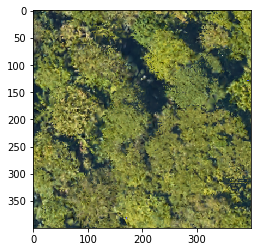

In [7]:
index = 9
crop = numpy_image[windows[index].indices()] 
crop.shape
plt.imshow(crop)

### Change from RGB to BGR channel order

Matplotlib and OpenCV differ in default channel orders. Using Image.open will yield RGB images, whereas keras-retinanet expects BGR images. Flip channel order using numpy. 

In [8]:
crop = crop[...,::-1] #keras-retinanet requires bluegreered channel order

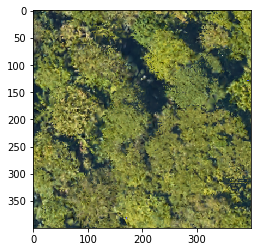

In [9]:
plt.imshow(crop[...,::-1]) #but matplotlib require redgreenblue order

## Predict from the prebuilt model

In [10]:
prediction = model.predict_image(raw_image = crop,return_plot=True, score_threshold=0.05)

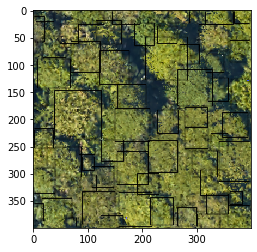

In [11]:
plt.imshow(prediction[...,::-1]) #show in rgb channel order

To get the bounding boxes as a dataframe, use return_plot=False

In [12]:
prediction_boxes = model.predict_image(raw_image = crop,return_plot=False, score_threshold=0.05)

In [13]:
prediction_boxes.head()

xmin        ymin        xmax        ymax     score label
0   39.942226  147.545990  125.531654  236.231201  0.784136  Tree
1  304.032593   26.757530  357.015259   75.317200  0.625443  Tree
2  317.521027   80.718277  350.360443  114.256851  0.577154  Tree
3  206.558334   49.206478  283.817230  128.984558  0.554278  Tree
4  150.457901  180.764999  214.140472  241.539474  0.550440  Tree

In [14]:
prediction_boxes.shape

(60, 6)

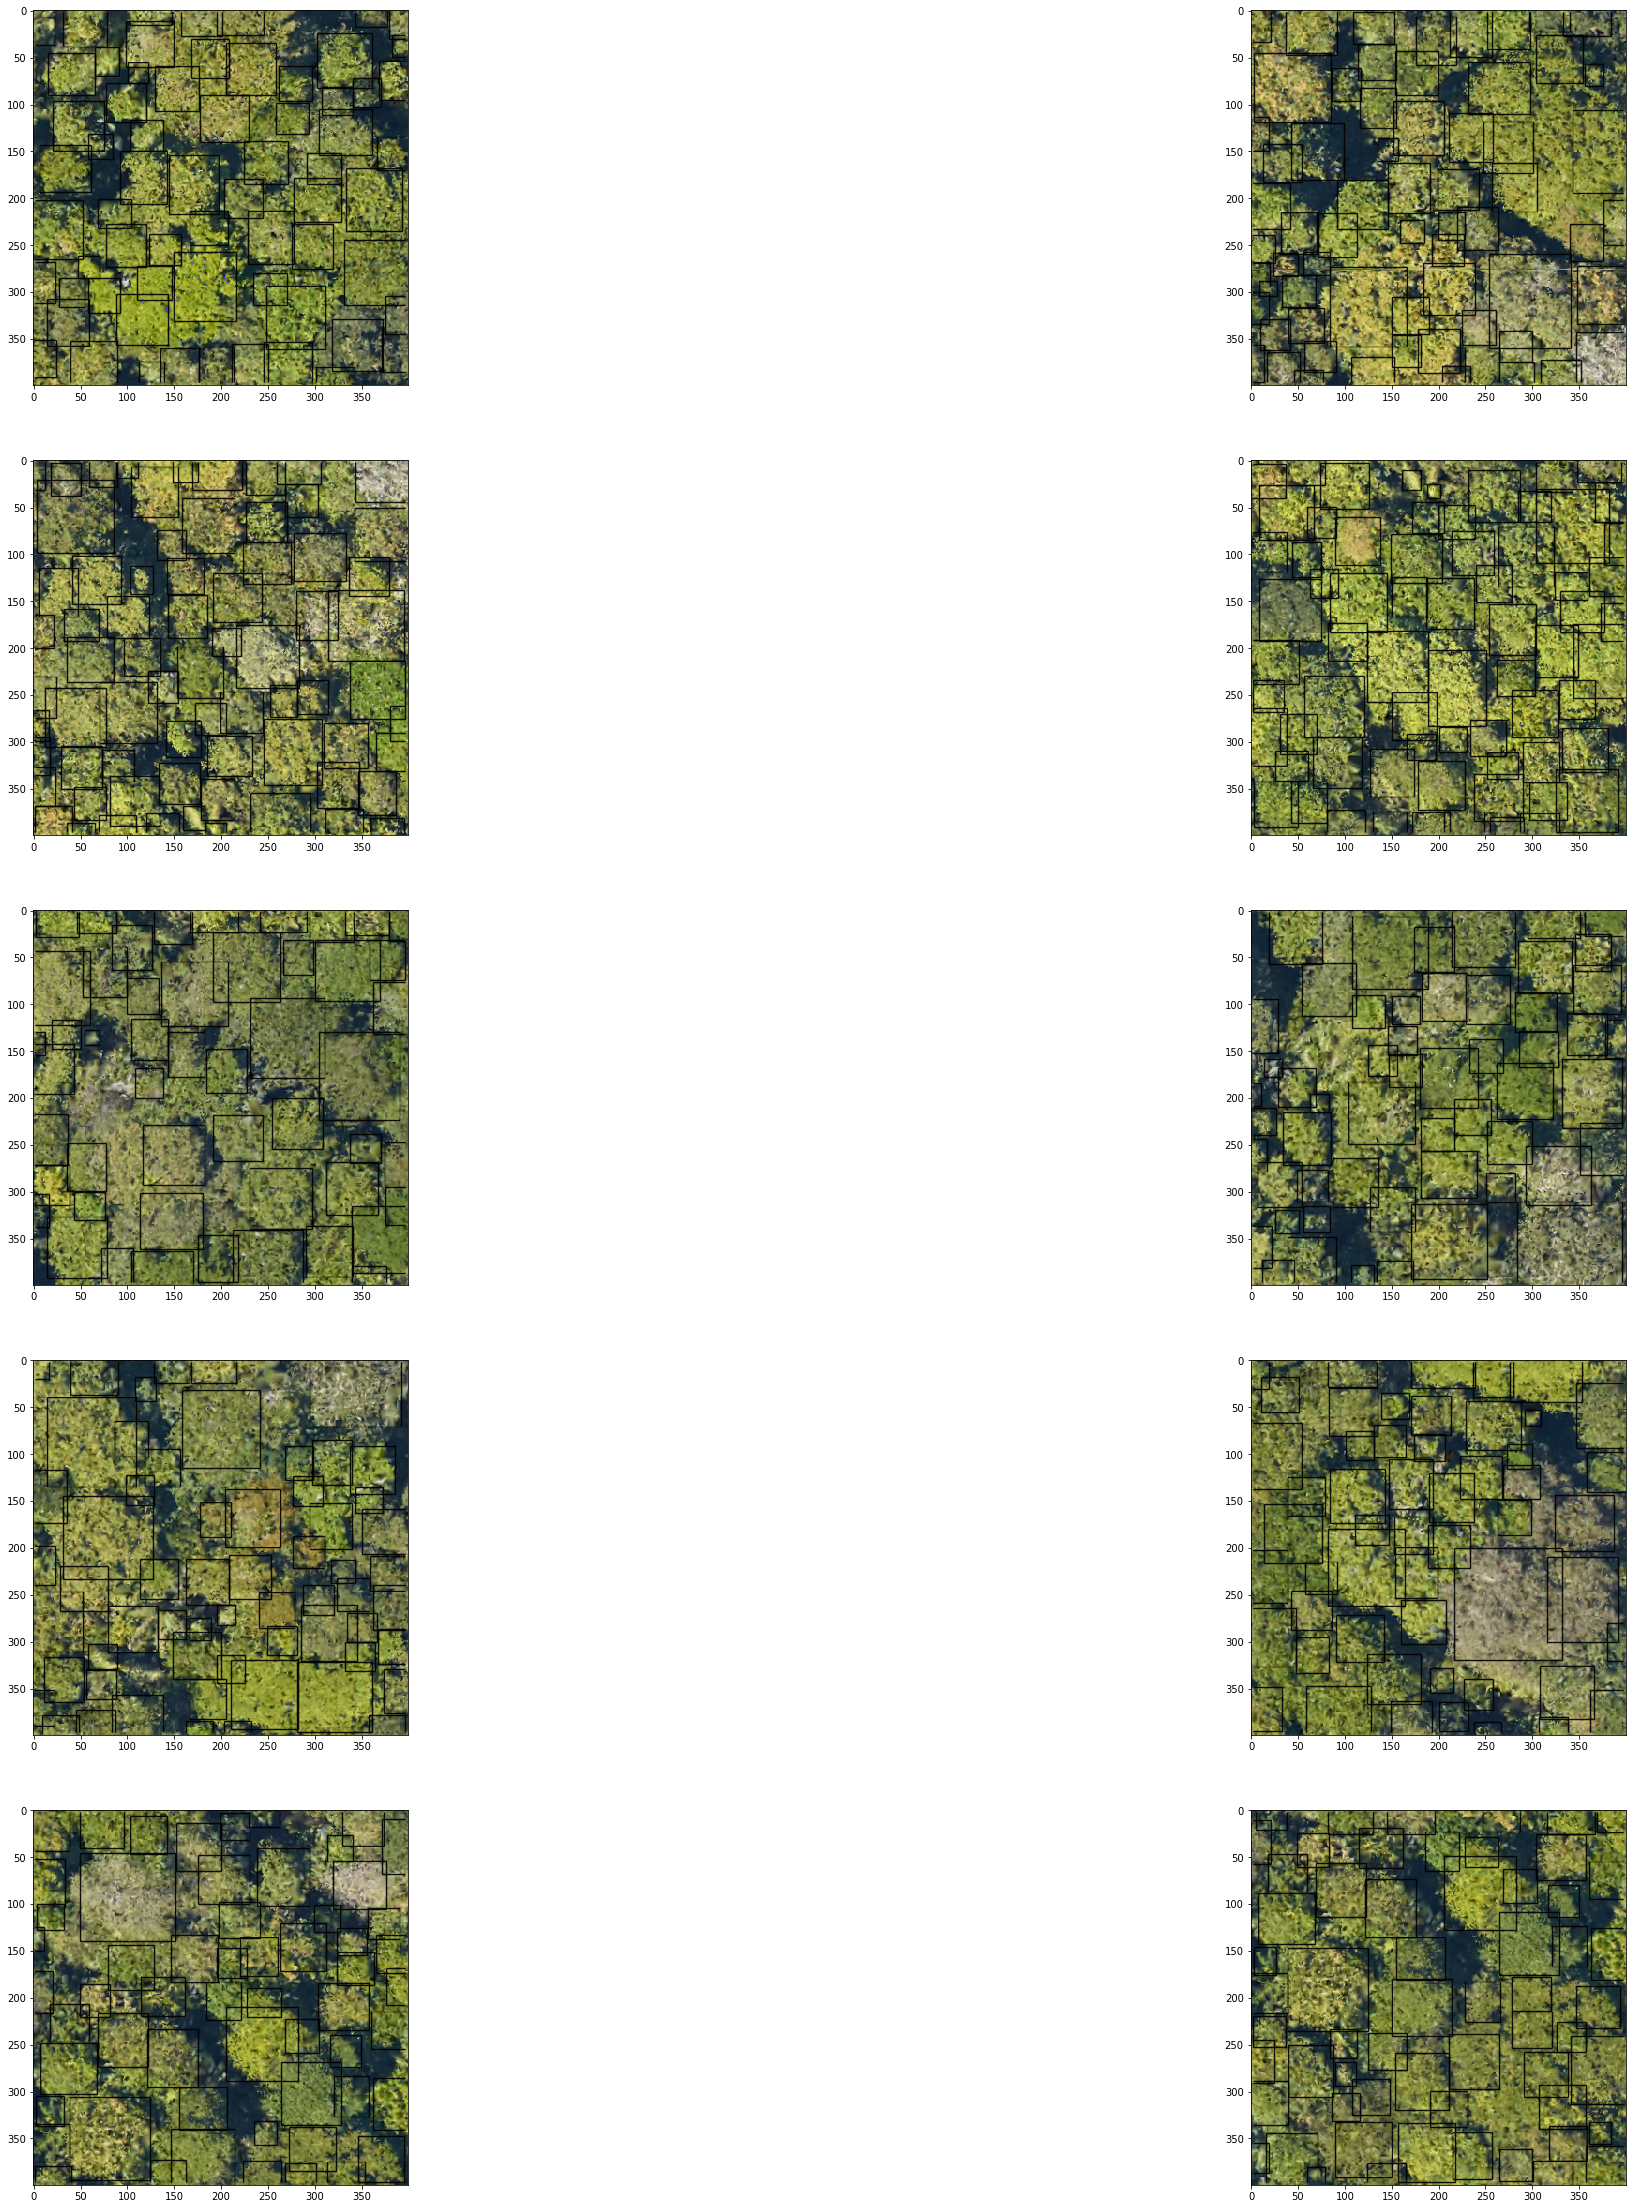

In [15]:
fig = plt.figure(figsize=(40,40))
fig.tight_layout() 
for index in range(10):
    crop = numpy_image[windows[index].indices()] 
    #predict in bgr channel order
    prediction = model.predict_image(raw_image = crop[...,::-1],return_plot=True, score_threshold=0.05)
    fig.add_subplot(5,2,index+1)
    #but plot in rgb channel order
    plt.imshow(prediction[...,::-1])

# Predict entire tile

In [ ]:
tile = model.predict_tile(raster_path,return_plot=True,patch_overlap=0.3,iou_threshold=0.2)

In [ ]:
fig = plt.figure(figsize=(150,150))
plt.imshow(tile)
plt.savefig("/Users/Ben/Desktop/overlap30_iou20.png")